In [1]:
import sys
sys.path.insert(0, 'D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Classes')

import warnings
warnings.filterwarnings('ignore')

from models import ClassificationModel, EmbeddingsModel
from trainer import SiameseTrainerCombinedLoss, all_subjects
import torch

In [2]:
subjects_test = all_subjects[:13]
subjects_train = [sub for sub in all_subjects if sub not in subjects_test]

In [30]:
trainer_hyperparameter = {
    "path": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects.pkl",
    "subjects_train": subjects_train,
    "subjects_test": subjects_test,
    "dataset_ignore_sample_subject_train": True,
    "dataset_ignore_sample_subject_test": False,
    "wandb": False,
    "log": True,
    "learning_rate": 0.001,
    "batch_size": 128,
    "batch_size_test": 128,
    "margin": 0.04,
    "lambda_loss": 0.01,
    "lr_steps": 2,
    "filter": [1, 2, 3, 4, 5, 6, -1, -2, -3, -4, -5, -6],
    "weight_decay": 0.1,
    "number_steps": 400,
    "number_steps_testing": 40
}

model_embedding_hyperparameter = {
    "sigmoid": False,
    "dropout": 0.5,
    "layers": [207, 200, 100]
}

model_classifier_hyperparameter = {
    "dropout": 0.5,
    "layers": [100, 50]
}

filter = lambda data: data["label"].isin(trainer_hyperparameter["filter"])

In [31]:
classifier_model = ClassificationModel(model_classifier_hyperparameter)
embedding_model = EmbeddingsModel(model_embedding_hyperparameter)

#_ = embedding_model.load_state_dict(torch.load("D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Results\models\embedding_models\model_abs_acc_89.40.pth"))
trainer = SiameseTrainerCombinedLoss(trainer_hyperparameter, classifier_model, embedding_model, device="cuda:0", filter=filter)

In [32]:
trainer.trainloop(5)

{'epoch': 1, 'train': {'loss': tensor(0.6780), 'acc': tensor(0.5976)}, 'test': {'loss': tensor(0.6898), 'acc': tensor(0.4599)}}
{'epoch': 2, 'train': {'loss': tensor(0.5576), 'acc': tensor(0.8921)}, 'test': {'loss': tensor(0.6901), 'acc': tensor(0.5146)}}
{'epoch': 3, 'train': {'loss': tensor(0.5445), 'acc': tensor(0.9274)}, 'test': {'loss': tensor(0.6910), 'acc': tensor(0.5103)}}
{'epoch': 4, 'train': {'loss': tensor(0.5773), 'acc': tensor(0.9183)}, 'test': {'loss': tensor(0.6903), 'acc': tensor(0.5090)}}


 35%|███▍      | 117/339 [00:59<02:13,  1.66it/s]

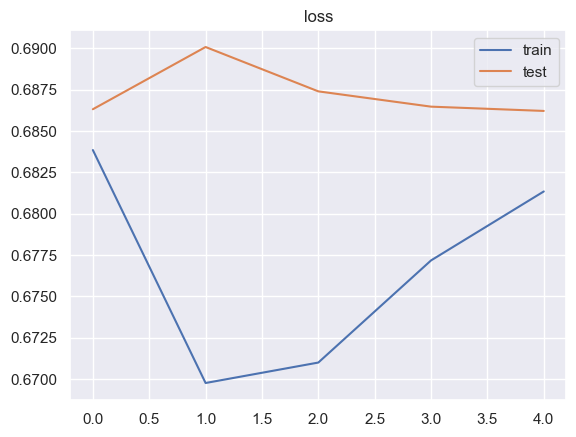

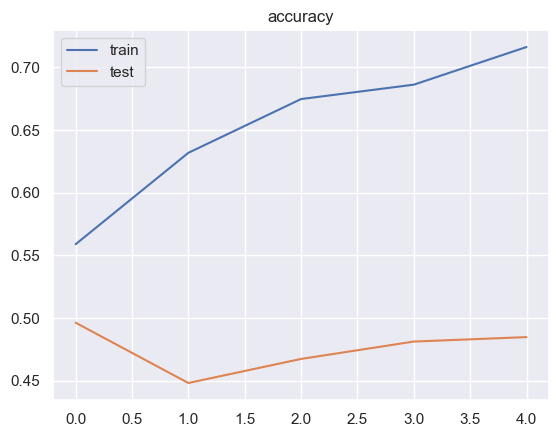

In [ ]:
trainer.plot_history()